In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from fbprophet import Prophet

In [2]:
df = pd.read_csv('/kaggle/input/bajajauto/BAJAJ-AUTO.csv')
df.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2008-05-26,BAJAJ-AUTO,EQ,2101.05,898.00,898.0,551.35,600.25,604.75,624.61,3972485,2.481245e+14,NaN,1202933,0.3028
1,2008-05-27,BAJAJ-AUTO,EQ,604.75,624.70,639.0,580.30,595.50,593.15,606.43,1751063,1.061901e+14,NaN,369389,0.2110
2,2008-05-28,BAJAJ-AUTO,EQ,593.15,561.65,621.9,561.65,605.10,608.15,608.75,1652355,1.005877e+14,NaN,898602,0.5438
3,2008-05-29,BAJAJ-AUTO,EQ,608.15,619.40,619.4,576.00,600.00,599.45,600.98,669269,4.022165e+13,NaN,449951,0.6723
4,2008-05-30,BAJAJ-AUTO,EQ,599.45,605.40,607.0,538.00,576.25,571.70,565.55,1262117,7.137937e+13,NaN,936432,0.7420


In [3]:
df.describe()

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
count,3037.000000,3037.000000,3037.000000,3037.000000,3037.000000,3037.000000,3037.000000,3.037000e+03,3.037000e+03,2291.000000,3.037000e+03,3037.000000
mean,2122.960207,2124.439825,2151.884063,2095.939546,2123.157853,2123.245341,2124.077027,3.846386e+05,8.481139e+13,25762.642951,1.927702e+05,0.522209
std,732.308940,733.771463,737.538378,728.815710,732.445085,732.468973,732.981924,3.376707e+05,8.460539e+13,16627.066729,1.730524e+05,0.166822
min,301.900000,262.000000,307.050000,262.000000,300.000000,301.900000,301.980000,4.966000e+03,2.497018e+11,451.000000,1.290000e+03,0.075700
25%,1633.750000,1635.000000,1655.000000,1611.400000,1635.000000,1633.750000,1635.200000,1.997830e+05,4.129735e+13,15603.000000,9.327900e+04,0.411000
50%,2179.800000,2172.950000,2209.350000,2141.000000,2179.900000,2179.950000,2178.680000,3.017740e+05,6.569269e+13,21923.000000,1.506500e+05,0.532200
75%,2747.650000,2755.000000,2785.000000,2718.600000,2749.750000,2749.150000,2752.790000,4.629420e+05,1.011617e+14,30820.500000,2.424750e+05,0.632900
max,3412.950000,3419.000000,3468.350000,3341.100000,3417.650000,3412.950000,3375.950000,4.976986e+06,1.465667e+15,209645.000000,4.154492e+06,1.000000


In [4]:
df_copy = df.copy()
# Change to datetime datatype.
df_copy.loc[:, 'Date'] = pd.to_datetime(df.loc[:,'Date'], format="%Y/%m/%d")

In [5]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3037 entries, 0 to 3036
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Date                3037 non-null   datetime64[ns]
 1   Symbol              3037 non-null   object        
 2   Series              3037 non-null   object        
 3   Prev Close          3037 non-null   float64       
 4   Open                3037 non-null   float64       
 5   High                3037 non-null   float64       
 6   Low                 3037 non-null   float64       
 7   Last                3037 non-null   float64       
 8   Close               3037 non-null   float64       
 9   VWAP                3037 non-null   float64       
 10  Volume              3037 non-null   int64         
 11  Turnover            3037 non-null   float64       
 12  Trades              2291 non-null   float64       
 13  Deliverable Volume  3037 non-null   int64       

In [6]:
p_df = df_copy[['Date','Close']]
p_df.rename(columns={'Close':'y', 'Date':'ds'}, inplace=True)
p_df.head()

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:4303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,ds,y
0,2008-05-26,604.75
1,2008-05-27,593.15
2,2008-05-28,608.15
3,2008-05-29,599.45
4,2008-05-30,571.70


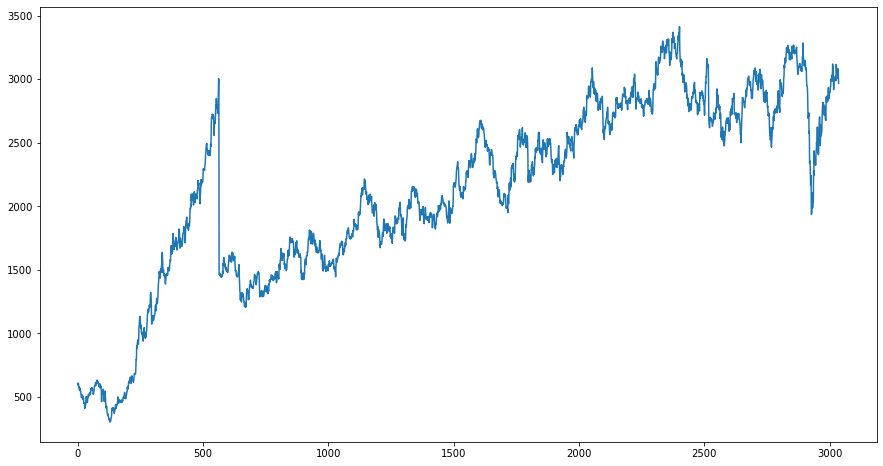

In [7]:
df['Close'].plot(figsize=(15,8))

In [8]:
m = Prophet()
m.fit(p_df)

In [9]:
# forecasting the Closing prices for next 2 years
future_prices = m.make_future_dataframe(periods=730)

forecast = m.predict(future_prices)

In [10]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2008-05-26,399.327344,98.605031,566.127817,399.327344,399.327344,-70.937404,-70.937404,-70.937404,-21.339654,-21.339654,-21.339654,-49.597750,-49.597750,-49.597750,0.0,0.0,0.0,328.389941
1,2008-05-27,400.115006,101.876427,544.058575,400.115006,400.115006,-67.061513,-67.061513,-67.061513,-20.701746,-20.701746,-20.701746,-46.359766,-46.359766,-46.359766,0.0,0.0,0.0,333.053494
2,2008-05-28,400.902669,110.114735,569.222899,400.902669,400.902669,-65.558320,-65.558320,-65.558320,-22.246856,-22.246856,-22.246856,-43.311465,-43.311465,-43.311465,0.0,0.0,0.0,335.344348
3,2008-05-29,401.690331,117.937086,578.639009,401.690331,401.690331,-57.367028,-57.367028,-57.367028,-16.899550,-16.899550,-16.899550,-40.467478,-40.467478,-40.467478,0.0,0.0,0.0,344.323303
4,2008-05-30,402.477993,109.112876,582.114497,402.477993,402.477993,-54.367659,-54.367659,-54.367659,-16.531874,-16.531874,-16.531874,-37.835785,-37.835785,-37.835785,0.0,0.0,0.0,348.110334


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


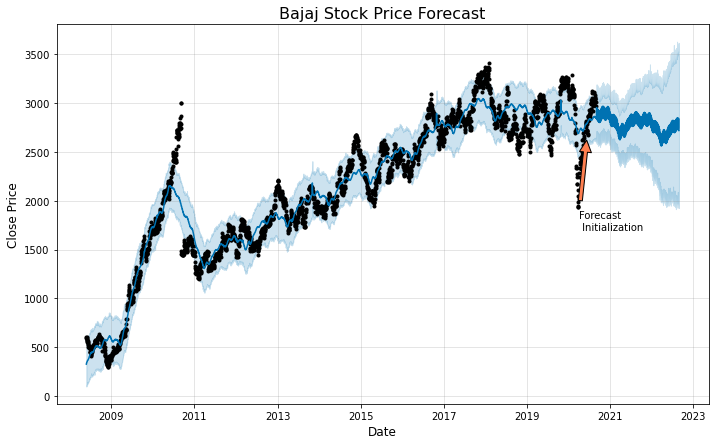

In [11]:
import matplotlib.dates as mdates

# Dates
starting_date = dt.datetime(2020, 4, 7)
starting_date1 = mdates.date2num(starting_date)
trend_date = dt.datetime(2020, 6, 7)
trend_date1 = mdates.date2num(trend_date)

pointing_arrow = dt.datetime(2020, 6, 18)
pointing_arrow1 = mdates.date2num(pointing_arrow)

# Learn more Prophet tomorrow and plot the forecast for bajaj.
fig = m.plot(forecast)
ax1 = fig.add_subplot(111)
ax1.set_title("Bajaj Stock Price Forecast", fontsize=16)
ax1.set_xlabel("Date", fontsize=12)
ax1.set_ylabel("Close Price", fontsize=12)

# Forecast initialization arrow
ax1.annotate('Forecast \n Initialization', xy=(pointing_arrow1, 2700), xytext=(starting_date1,1700),
            arrowprops=dict(facecolor='#ff7f50', shrink=0.1))

plt.show()

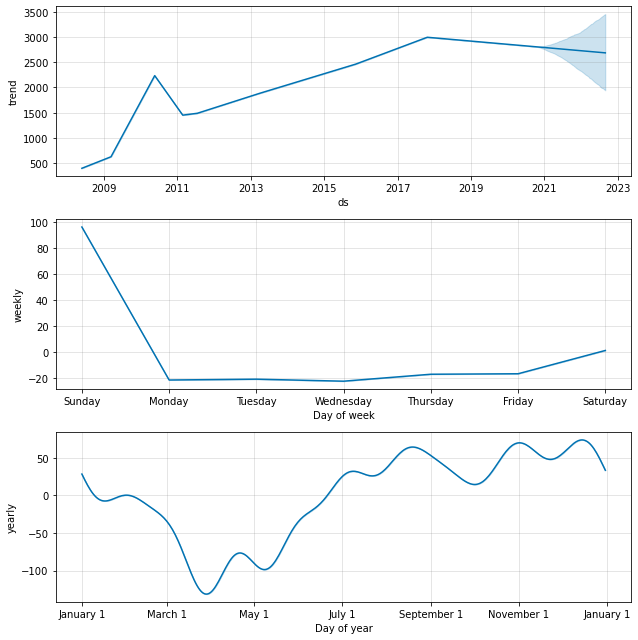

In [12]:
m.plot_components(forecast)
plt.show()

* Bajaj's stock price is showing signs of decreasing trend yearly. 